In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

## Data Loading



In [2]:
# loading data here
heart = pd.read_csv("Data/heart.csv")

## Data visualization



In [3]:
# use for final project
sorted_heart = heart.sort_values(by = 'HeartDisease', ascending = True)
fig = px.bar(sorted_heart, y = "Cholesterol", x= "MaxHR", color= "HeartDisease", title = "Cholesterol and MaxHR's Effect on Heart Disease")
fig.update_layout(width=1500, height=800)
fig.show()

Interpretation: The bar graph shows how people with a lower max heart rate have a slightly higher chance of getting heart heart disease. For example, a person who has a max heart rate of 180 is far more likely to not have heart disease than to have it, and a person with a max heart rate of 105 is more likely to have heart rate than to not have it. The graph also shows that people with higher cholesterol are more likely to be diagnosed with heart disease. 



In [4]:
# use for final project
fig = px.scatter(heart,color_discrete_sequence=px.colors.qualitative.Pastel, x="Age", y="Cholesterol",
	         size="Cholesterol", color="HeartDisease",
                 hover_name="Sex", log_x=True, size_max=25, title = "Age and Cholesterol's Correlation to Heart Disease")

fig.update_layout(width=1000, height=600)
fig.show()


Interpretation: This bubble chart shows the correlation between a person's age and their cholesterol levels. If the color is teal, the user does not have heart disease. If the bubble color is yellow, the user does have heart disease. There does not seem to be a correlation between age and cholesterol because each age group has multiple users with varying cholesterol levels and a clear line of best fit cannot be drawn. 



In [5]:
# use for final project
fig = px.imshow(heart.corr(), color_continuous_scale='pubu', title = "Correlation Between Different Parameters and Heart Disease")
fig.show()

Interpretation: This heat map shows the correlations between different variables such as age, resting blood pressure, cholesterol, fasting 
blood sugar, maximum heart rate, and oldpeak. For each combination of two variables, a block of color is shown. If the color is dark blue, the relationship between the two variables is strong. If the color is light blue, the relationship is weak. The diagonal line of dark blue squares is predictable because the data for the same variables \(ex. age and age\) is identical. Therefore, the correlation is extremely strong. However, we can see that there is no correlation between age and maximum heart rate because the color is almost 0. 



In [6]:
# use for final project
fig = px.box(heart, y="RestingBP", x='HeartDisease', title="Resting BP vs Heart Disease",color="Sex")
fig.update_layout(width=1000, height=700)
fig.show()

Interpretation: This box plot shows that resting blood pressure is not a crucial factor concerning heart disease. Each plot has a similar median, so it is hard to differentiate whether or not the blood pressure will affect if a person will get heart disease. 



In [7]:
# use for final project
fig = px.density_contour(heart, x="Age", y="MaxHR", title="MaxHR vs Age", facet_col="Sex", color="HeartDisease")
fig.update_layout(width=1500, height=800)
fig.show()

Interpretation: The density contour shows the correlation between maximum heart rate and age for females and males. It is evident that in both graphs people who were diagnosed with heart disease have a greater maximum heart rate than people who were not diagnosed with heart disease. However, the maximum heart rates become similar as the age increases. 


In [8]:
fig = px.density_contour(heart, x="Age", y="MaxHR", title= "MaxHR vs Age")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.update_layout(width=1000, height=600)
fig.show()

Interpretation: This density contour shows different ages compared to the maximum heart rate. At the age of 52\-57, the max heart rate is at 124.5 which shows that 34 people at this age have a similar max heart rate.


## Data Cleaning and Pre\-processing



In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
# remove outlier
# heart[(heart['RestingBP'] == 0) & (heart['HeartDisease'] == 1)]
row_to_drop = [449]
heart.drop(row_to_drop, axis= 0, inplace= True)

# convert categorical value into numerical
heart_update = pd.get_dummies(heart, columns = ['RestingECG','Sex','ChestPainType', 'ST_Slope', 'ExerciseAngina'])

## Data Modeling



In [12]:
# loading library
import sklearn
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [13]:
# Spliting Data into train and testing
target = heart_update["HeartDisease"]
input_columns = heart_update.loc[:, heart_update.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state=42)

## Naive Bayes Classifier



<AxesSubplot:>

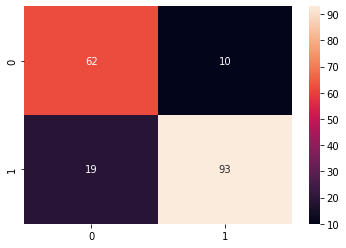

In [14]:
#GaussianNB:
my_naive_model = GaussianNB() #defining model
my_naive_model.fit(x_train, y_train) #fitting model
y_hat = my_naive_model.predict(x_test) #predictions
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g') #heatmap

In [15]:
print("Recall score:", recall_score(y_test, y_hat))
print ("f1_score:", f1_score(y_test, y_hat))
accuracy_score(y_test, y_hat)

Recall score: 0.8303571428571429
f1_score: 0.8651162790697675


0.842391304347826

<AxesSubplot:>

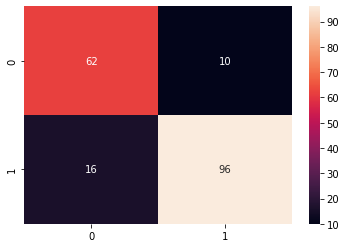

In [16]:
#GridSearchCV:
parameters = {'var_smoothing': np.logspace(0,-9, num=50)} #getting better parameters
grid = GridSearchCV(my_naive_model, parameters) #defining model
grid.fit(x_train, y_train) #fitting model
grid.best_params_
y_hat = grid.predict(x_test) #predictions
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g') #heatmap

In [17]:
print("Recall score:", recall_score(y_test, y_hat))
print ("f1_score:", f1_score(y_test, y_hat))
accuracy_score(y_test, y_hat)

Recall score: 0.8571428571428571
f1_score: 0.8807339449541285


0.8586956521739131

<AxesSubplot:>

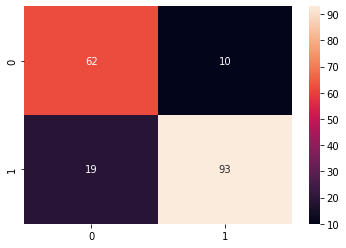

In [18]:
#StandardScaler:
my_standard_scaler = StandardScaler() #defining model
x_train_scaled = my_standard_scaler.fit_transform(x_train)
x_test_scaled = my_standard_scaler.transform(x_test)
parameters = {'var_smoothing': np.logspace(0,-9, num=50)}
grid = GridSearchCV(my_naive_model, parameters) #defining model
grid.fit(x_train_scaled, y_train) #fitting model
grid.best_params_
y_hat = grid.predict(x_test_scaled) #predictions
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g') #heatmap

In [19]:
print("Recall score:", recall_score(y_test, y_hat))
print ("f1_score:", f1_score(y_test, y_hat))
accuracy_score(y_test, y_hat)

Recall score: 0.8303571428571429
f1_score: 0.8651162790697675


0.842391304347826

## Random Forest



<AxesSubplot:>

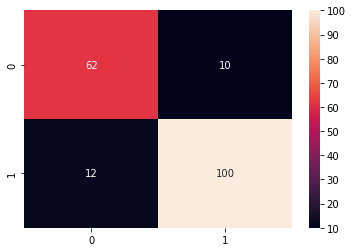

In [36]:
# RandomForest
my_RFC = RandomForestClassifier()
my_RFC.fit(x_train, y_train)
y_hat = my_RFC.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [37]:
print ('Accuracy score:', accuracy_score(y_test, y_hat))
print ('Recall score:', recall_score(y_test, y_hat))
print ('F1 score:', f1_score(y_test, y_hat))

Accuracy score: 0.8804347826086957
Recall score: 0.8928571428571429
F1 score: 0.9009009009009009


In [30]:
# GridSearchCV
RFC = RandomForestClassifier(random_state = 45)
parameters = {'max_depth':[50, 80, 100],  'max_features': [2, 3, 4], 'min_samples_split': [1, 2, 3], 'n_estimators': [75, 100, 200], 'criterion': ['gini', 'entropy', 'log_loss']}
grid_rf = GridSearchCV(RFC, parameters, verbose = 1)

grid_rf.fit(x_train, y_train)
grid_rf.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [31]:
y_hat_rf = grid_rf.predict(x_test)

<AxesSubplot:>

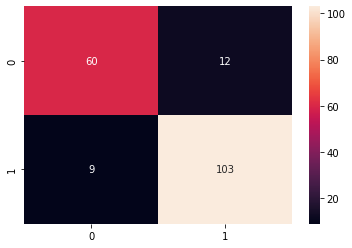

In [32]:
sns.heatmap(confusion_matrix(y_test, y_hat_rf), annot=True, fmt='g')

In [33]:
print("Accuracy Score:", accuracy_score(y_test, y_hat_rf))
print("Recall Score:", recall_score(y_test, y_hat_rf))
print("F1 Score:", f1_score(y_test, y_hat_rf))

Accuracy Score: 0.8858695652173914
Recall Score: 0.9196428571428571
F1 Score: 0.9074889867841409


## SVM



mean squared error: 0.2608695652173913


<AxesSubplot:>

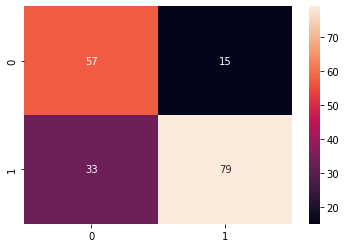

In [26]:
svclassifier = SVC() #Defining model 
svclassifier.fit(x_train, y_train) #Fit the model 
y_hat = svclassifier.predict(x_test) #original predictions 
y_test = y_test.astype('int') 
total_squared_error = (np.sum((y_test - y_hat)**2)) #mean squared error 
mean_squared_error = total_squared_error/len(y_test) 
print("mean squared error:", mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g') #heat map for original

In [27]:
print ('Accuracy score:', accuracy_score(y_test, y_hat))
print ('Recall score:', recall_score(y_test, y_hat))
print ('F1 score:', f1_score(y_test, y_hat))

Accuracy score: 0.7391304347826086
Recall score: 0.7053571428571429
F1 score: 0.7669902912621359


Fitting 5 folds for each of 18 candidates, totalling 90 fits


<AxesSubplot:>

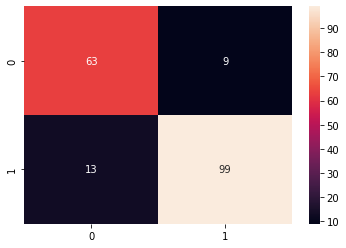

In [28]:
parameters = {'kernel':('rbf', 'linear', 'sigmoid'), 'degree' : (1,8,9), 'C':[1, 7]}

grid_svm = GridSearchCV(svclassifier, parameters, verbose = 1)
grid_svm.fit(x_train, y_train)
grid_svm.best_params_ #finding the best parameters 
svcclassifier = SVC(C = 7, degree = 1, kernel = 'linear') #best parameters 
svcclassifier.fit(x_train, y_train) #fitting the improved model 
y_hat = svcclassifier.predict(x_test) # predictions with improved model
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')  #heat map for improved model

In [29]:
print ('Accuracy score:', accuracy_score(y_test, y_hat))
print ('Recall score:',recall_score(y_test, y_hat))
print ('F1 score:', f1_score(y_test, y_hat))

Accuracy score: 0.8804347826086957
Recall score: 0.8839285714285714
F1 score: 0.8999999999999999
